In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [29]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)



In [13]:
from library import get_data, normalize

In [7]:
indices = ["^GSPC","SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB"]


In [8]:
start_date = "2003-01-01"
end_date = "2017-01-01"
dates = pd.date_range(start_date, end_date) 

In [10]:
df_index = get_data(indices, dates)

In [12]:
df_index.fillna(method='ffill', inplace=True)# fill Nan with previos value as order is ascending date 
df_index.fillna(method='bfill', inplace=True)

In [14]:
X=df_index[["SPY","^IXIC", "^DJI", "^GDAXI", "^FTSE","^FCHI", "^N225","^HSI", "^AXJO","ORB"]]
y=df_index[["^GSPC"]]

In [101]:
y[-2:]

array([ 2249.26001 ,  2238.830078])

In [16]:
X_normalized=normalize(X,X.columns)

In [23]:
df_final = X_normalized.join(y)

In [25]:
df_final.head(1)

,SPY,^IXIC,^DJI,^GDAXI,^FTSE,^FCHI,^N225,^HSI,^AXJO,ORB,^GSPC
2003-01-02,0.0664,0.027546,0.153451,0.088685,0.18738,0.210347,0.120057,0.041177,0.079258,0.064017,909.030029


In [26]:
data=df_final.values

In [30]:
n_steps = 5
# convert into input/output
X, y = split_sequences(data, n_steps)

In [35]:
X.shape, y.shape

((3521, 5, 10), (3521,))

In [36]:
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

In [76]:
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

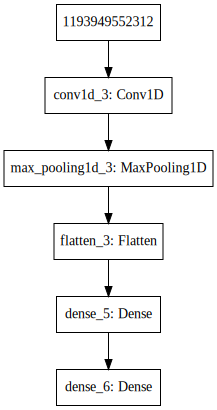

In [77]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 4, 64)             1344      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 14,345
Trainable params: 14,345
Non-trainable params: 0
_________________________________________________________________


In [114]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [115]:
X_train.shape, y_train.shape

((2816, 5, 10), (2816,))

In [116]:
history=model.fit(X_train, y_train, epochs=3000, verbose=2, validation_split=0.15, shuffle=False)

Train on 2393 samples, validate on 423 samples
Epoch 1/3000
 - 0s - loss: 270.0813 - val_loss: 251.0769
Epoch 2/3000
 - 0s - loss: 381.7458 - val_loss: 851.4034
Epoch 3/3000
 - 0s - loss: 379.5042 - val_loss: 2551.4262
Epoch 4/3000
 - 0s - loss: 302.5480 - val_loss: 2948.6033
Epoch 5/3000
 - 0s - loss: 294.4342 - val_loss: 3616.3997
Epoch 6/3000
 - 0s - loss: 334.9822 - val_loss: 4441.2225
Epoch 7/3000
 - 0s - loss: 405.8428 - val_loss: 5466.1572
Epoch 8/3000
 - 0s - loss: 490.2597 - val_loss: 6513.9441
Epoch 9/3000
 - 0s - loss: 567.7023 - val_loss: 6937.7892
Epoch 10/3000
 - 0s - loss: 631.3013 - val_loss: 5943.6432
Epoch 11/3000
 - 0s - loss: 694.4116 - val_loss: 3496.3530
Epoch 12/3000
 - 0s - loss: 787.7159 - val_loss: 928.6656
Epoch 13/3000
 - 0s - loss: 956.3805 - val_loss: 551.8607
Epoch 14/3000
 - 0s - loss: 1171.1806 - val_loss: 3255.8103
Epoch 15/3000
 - 0s - loss: 1237.4758 - val_loss: 5282.0453
Epoch 16/3000
 - 0s - loss: 1054.4497 - val_loss: 4215.6610
Epoch 17/3000
 - 0s

Epoch 140/3000
 - 0s - loss: 372.9292 - val_loss: 2830.0605
Epoch 141/3000
 - 0s - loss: 384.2346 - val_loss: 2916.9082
Epoch 142/3000
 - 0s - loss: 395.5413 - val_loss: 2969.6540
Epoch 143/3000
 - 0s - loss: 407.3318 - val_loss: 3009.8578
Epoch 144/3000
 - 0s - loss: 418.3408 - val_loss: 3025.8442
Epoch 145/3000
 - 0s - loss: 429.0120 - val_loss: 3029.1134
Epoch 146/3000
 - 0s - loss: 439.1884 - val_loss: 3027.9467
Epoch 147/3000
 - 0s - loss: 448.9723 - val_loss: 3027.7081
Epoch 148/3000
 - 0s - loss: 458.8386 - val_loss: 3039.6886
Epoch 149/3000
 - 0s - loss: 469.3742 - val_loss: 3067.1932
Epoch 150/3000
 - 0s - loss: 480.5991 - val_loss: 3106.6428
Epoch 151/3000
 - 0s - loss: 493.2084 - val_loss: 3157.6182
Epoch 152/3000
 - 0s - loss: 507.4411 - val_loss: 3210.9679
Epoch 153/3000
 - 0s - loss: 523.6004 - val_loss: 3263.8451
Epoch 154/3000
 - 0s - loss: 541.8554 - val_loss: 3311.0603
Epoch 155/3000
 - 0s - loss: 561.8381 - val_loss: 3347.7988
Epoch 156/3000
 - 0s - loss: 583.5316 - 

Epoch 277/3000
 - 0s - loss: 398.5730 - val_loss: 1222.7314
Epoch 278/3000
 - 0s - loss: 400.6002 - val_loss: 1197.4748
Epoch 279/3000
 - 0s - loss: 399.1001 - val_loss: 1225.5192
Epoch 280/3000
 - 0s - loss: 395.5787 - val_loss: 1317.7702
Epoch 281/3000
 - 0s - loss: 392.1961 - val_loss: 1473.2447
Epoch 282/3000
 - 0s - loss: 390.1614 - val_loss: 1677.7057
Epoch 283/3000
 - 0s - loss: 391.3695 - val_loss: 1905.7236
Epoch 284/3000
 - 0s - loss: 396.9320 - val_loss: 2135.4920
Epoch 285/3000
 - 0s - loss: 408.2008 - val_loss: 2329.2497
Epoch 286/3000
 - 0s - loss: 423.9709 - val_loss: 2449.6765
Epoch 287/3000
 - 0s - loss: 443.3062 - val_loss: 2463.1468
Epoch 288/3000
 - 0s - loss: 464.4227 - val_loss: 2360.4867
Epoch 289/3000
 - 0s - loss: 485.0609 - val_loss: 2161.8263
Epoch 290/3000
 - 0s - loss: 503.2846 - val_loss: 1934.3229
Epoch 291/3000
 - 0s - loss: 516.2432 - val_loss: 1740.4797
Epoch 292/3000
 - 0s - loss: 521.4185 - val_loss: 1627.1951
Epoch 293/3000
 - 0s - loss: 518.1593 - 

 - 0s - loss: 384.5942 - val_loss: 214.3535
Epoch 415/3000
 - 0s - loss: 388.1174 - val_loss: 239.5465
Epoch 416/3000
 - 0s - loss: 375.6002 - val_loss: 712.9497
Epoch 417/3000
 - 0s - loss: 359.5721 - val_loss: 1665.0163
Epoch 418/3000
 - 0s - loss: 353.6756 - val_loss: 2877.5285
Epoch 419/3000
 - 0s - loss: 361.3038 - val_loss: 4045.9815
Epoch 420/3000
 - 0s - loss: 370.6746 - val_loss: 3940.1229
Epoch 421/3000
 - 0s - loss: 376.0846 - val_loss: 2496.1813
Epoch 422/3000
 - 0s - loss: 379.6326 - val_loss: 915.0246
Epoch 423/3000
 - 0s - loss: 415.3350 - val_loss: 316.2611
Epoch 424/3000
 - 0s - loss: 503.2236 - val_loss: 1172.3398
Epoch 425/3000
 - 0s - loss: 630.7296 - val_loss: 3090.9751
Epoch 426/3000
 - 0s - loss: 715.1596 - val_loss: 3351.4325
Epoch 427/3000
 - 0s - loss: 668.1079 - val_loss: 1781.2119
Epoch 428/3000
 - 0s - loss: 669.4293 - val_loss: 701.2139
Epoch 429/3000
 - 0s - loss: 689.4965 - val_loss: 222.6670
Epoch 430/3000
 - 0s - loss: 687.2583 - val_loss: 314.5887
Epo

Epoch 553/3000
 - 0s - loss: 370.7237 - val_loss: 1176.7532
Epoch 554/3000
 - 0s - loss: 359.3083 - val_loss: 1035.8337
Epoch 555/3000
 - 0s - loss: 344.4302 - val_loss: 897.2373
Epoch 556/3000
 - 0s - loss: 327.3912 - val_loss: 778.0557
Epoch 557/3000
 - 0s - loss: 310.6552 - val_loss: 688.2848
Epoch 558/3000
 - 0s - loss: 296.3651 - val_loss: 631.8032
Epoch 559/3000
 - 0s - loss: 286.2923 - val_loss: 610.4703
Epoch 560/3000
 - 0s - loss: 281.5589 - val_loss: 626.0023
Epoch 561/3000
 - 0s - loss: 281.6789 - val_loss: 675.6022
Epoch 562/3000
 - 0s - loss: 286.8332 - val_loss: 761.8263
Epoch 563/3000
 - 0s - loss: 296.7275 - val_loss: 883.9489
Epoch 564/3000
 - 0s - loss: 310.5155 - val_loss: 1037.8106
Epoch 565/3000
 - 0s - loss: 327.3394 - val_loss: 1214.6632
Epoch 566/3000
 - 0s - loss: 344.3275 - val_loss: 1384.8810
Epoch 567/3000
 - 0s - loss: 360.5130 - val_loss: 1528.4494
Epoch 568/3000
 - 0s - loss: 371.8425 - val_loss: 1597.1668
Epoch 569/3000
 - 0s - loss: 377.3904 - val_loss:

Epoch 691/3000
 - 0s - loss: 776.5403 - val_loss: 2066.3611
Epoch 692/3000
 - 0s - loss: 830.9584 - val_loss: 1985.3044
Epoch 693/3000
 - 0s - loss: 884.5835 - val_loss: 1812.4488
Epoch 694/3000
 - 0s - loss: 936.4727 - val_loss: 1565.3919
Epoch 695/3000
 - 0s - loss: 983.7819 - val_loss: 1302.4664
Epoch 696/3000
 - 0s - loss: 1013.9926 - val_loss: 1130.9714
Epoch 697/3000
 - 0s - loss: 1004.5061 - val_loss: 930.9320
Epoch 698/3000
 - 0s - loss: 979.6012 - val_loss: 769.6616
Epoch 699/3000
 - 0s - loss: 936.3294 - val_loss: 650.6839
Epoch 700/3000
 - 0s - loss: 876.7016 - val_loss: 574.5380
Epoch 701/3000
 - 0s - loss: 804.0196 - val_loss: 524.2331
Epoch 702/3000
 - 0s - loss: 727.4151 - val_loss: 488.7202
Epoch 703/3000
 - 0s - loss: 653.6605 - val_loss: 463.9001
Epoch 704/3000
 - 0s - loss: 587.7762 - val_loss: 454.2812
Epoch 705/3000
 - 0s - loss: 529.7174 - val_loss: 459.9595
Epoch 706/3000
 - 0s - loss: 479.8613 - val_loss: 480.2258
Epoch 707/3000
 - 0s - loss: 438.6425 - val_loss

Epoch 829/3000
 - 0s - loss: 235.1932 - val_loss: 506.8814
Epoch 830/3000
 - 0s - loss: 234.4638 - val_loss: 506.5248
Epoch 831/3000
 - 0s - loss: 233.9226 - val_loss: 505.0883
Epoch 832/3000
 - 0s - loss: 233.6080 - val_loss: 503.3576
Epoch 833/3000
 - 0s - loss: 232.9663 - val_loss: 501.5767
Epoch 834/3000
 - 0s - loss: 232.6716 - val_loss: 498.5784
Epoch 835/3000
 - 0s - loss: 232.4717 - val_loss: 495.3358
Epoch 836/3000
 - 0s - loss: 231.9094 - val_loss: 491.8134
Epoch 837/3000
 - 0s - loss: 232.0609 - val_loss: 488.1366
Epoch 838/3000
 - 0s - loss: 231.3408 - val_loss: 484.2229
Epoch 839/3000
 - 0s - loss: 231.3592 - val_loss: 480.0369
Epoch 840/3000
 - 0s - loss: 230.7712 - val_loss: 476.9054
Epoch 841/3000
 - 0s - loss: 230.3702 - val_loss: 474.0378
Epoch 842/3000
 - 0s - loss: 229.4034 - val_loss: 472.8200
Epoch 843/3000
 - 0s - loss: 228.9127 - val_loss: 472.4661
Epoch 844/3000
 - 0s - loss: 227.6110 - val_loss: 473.9081
Epoch 845/3000
 - 0s - loss: 226.6333 - val_loss: 476.88

Epoch 968/3000
 - 0s - loss: 382.4120 - val_loss: 826.2496
Epoch 969/3000
 - 0s - loss: 384.3064 - val_loss: 820.2813
Epoch 970/3000
 - 0s - loss: 385.5920 - val_loss: 822.1708
Epoch 971/3000
 - 0s - loss: 385.1973 - val_loss: 811.5218
Epoch 972/3000
 - 0s - loss: 384.3881 - val_loss: 804.6000
Epoch 973/3000
 - 0s - loss: 383.2896 - val_loss: 792.2946
Epoch 974/3000
 - 0s - loss: 382.0023 - val_loss: 775.6110
Epoch 975/3000
 - 0s - loss: 379.2613 - val_loss: 752.1615
Epoch 976/3000
 - 0s - loss: 375.1446 - val_loss: 735.2721
Epoch 977/3000
 - 0s - loss: 371.1430 - val_loss: 717.2100
Epoch 978/3000
 - 0s - loss: 366.9790 - val_loss: 706.9645
Epoch 979/3000
 - 0s - loss: 364.7777 - val_loss: 687.4789
Epoch 980/3000
 - 0s - loss: 360.6080 - val_loss: 665.5986
Epoch 981/3000
 - 0s - loss: 358.2620 - val_loss: 641.5775
Epoch 982/3000
 - 0s - loss: 353.0826 - val_loss: 612.7641
Epoch 983/3000
 - 0s - loss: 349.1341 - val_loss: 582.3255
Epoch 984/3000
 - 0s - loss: 335.6353 - val_loss: 525.51

Epoch 1105/3000
 - 0s - loss: 521.6346 - val_loss: 718.5176
Epoch 1106/3000
 - 0s - loss: 568.1892 - val_loss: 926.0225
Epoch 1107/3000
 - 0s - loss: 659.4128 - val_loss: 1035.9262
Epoch 1108/3000
 - 0s - loss: 786.0818 - val_loss: 1023.3269
Epoch 1109/3000
 - 0s - loss: 932.9867 - val_loss: 945.7318
Epoch 1110/3000
 - 0s - loss: 1083.6058 - val_loss: 853.0086
Epoch 1111/3000
 - 0s - loss: 1226.6378 - val_loss: 732.8747
Epoch 1112/3000
 - 0s - loss: 1361.7197 - val_loss: 591.8843
Epoch 1113/3000
 - 0s - loss: 1478.6431 - val_loss: 460.5924
Epoch 1114/3000
 - 0s - loss: 1561.5962 - val_loss: 375.6876
Epoch 1115/3000
 - 0s - loss: 1588.4751 - val_loss: 354.9274
Epoch 1116/3000
 - 0s - loss: 1544.5996 - val_loss: 387.4459
Epoch 1117/3000
 - 0s - loss: 1433.0937 - val_loss: 446.4578
Epoch 1118/3000
 - 0s - loss: 1268.1354 - val_loss: 499.6601
Epoch 1119/3000
 - 0s - loss: 1079.0402 - val_loss: 521.0623
Epoch 1120/3000
 - 0s - loss: 895.2282 - val_loss: 515.6391
Epoch 1121/3000
 - 0s - loss

 - 0s - loss: 464.3378 - val_loss: 173.9056
Epoch 1242/3000
 - 0s - loss: 450.5607 - val_loss: 147.4675
Epoch 1243/3000
 - 0s - loss: 427.9097 - val_loss: 140.8539
Epoch 1244/3000
 - 0s - loss: 402.6729 - val_loss: 145.5226
Epoch 1245/3000
 - 0s - loss: 379.4132 - val_loss: 150.7097
Epoch 1246/3000
 - 0s - loss: 359.9815 - val_loss: 151.5440
Epoch 1247/3000
 - 0s - loss: 342.8927 - val_loss: 144.2505
Epoch 1248/3000
 - 0s - loss: 325.6870 - val_loss: 134.9742
Epoch 1249/3000
 - 0s - loss: 308.1284 - val_loss: 133.3612
Epoch 1250/3000
 - 0s - loss: 288.6339 - val_loss: 141.4488
Epoch 1251/3000
 - 0s - loss: 268.2422 - val_loss: 154.8376
Epoch 1252/3000
 - 0s - loss: 249.2826 - val_loss: 167.7777
Epoch 1253/3000
 - 0s - loss: 232.4976 - val_loss: 174.9617
Epoch 1254/3000
 - 0s - loss: 218.0124 - val_loss: 183.4238
Epoch 1255/3000
 - 0s - loss: 206.5808 - val_loss: 197.6988
Epoch 1256/3000
 - 0s - loss: 196.9864 - val_loss: 225.9847
Epoch 1257/3000
 - 0s - loss: 190.0631 - val_loss: 272.7

 - 0s - loss: 384.7481 - val_loss: 1116.2608
Epoch 1378/3000
 - 0s - loss: 406.6415 - val_loss: 994.1037
Epoch 1379/3000
 - 0s - loss: 402.6536 - val_loss: 603.2991
Epoch 1380/3000
 - 0s - loss: 389.1722 - val_loss: 255.0797
Epoch 1381/3000
 - 0s - loss: 368.0786 - val_loss: 342.7090
Epoch 1382/3000
 - 0s - loss: 357.0763 - val_loss: 1178.0492
Epoch 1383/3000
 - 0s - loss: 390.3509 - val_loss: 2281.0730
Epoch 1384/3000
 - 0s - loss: 480.6998 - val_loss: 3143.0112
Epoch 1385/3000
 - 0s - loss: 603.6463 - val_loss: 2643.1681
Epoch 1386/3000
 - 0s - loss: 795.8785 - val_loss: 1196.5840
Epoch 1387/3000
 - 0s - loss: 1038.6325 - val_loss: 371.5654
Epoch 1388/3000
 - 0s - loss: 1173.4539 - val_loss: 345.4489
Epoch 1389/3000
 - 0s - loss: 1164.6751 - val_loss: 372.4733
Epoch 1390/3000
 - 0s - loss: 1097.3074 - val_loss: 568.4957
Epoch 1391/3000
 - 0s - loss: 1104.1684 - val_loss: 560.1315
Epoch 1392/3000
 - 0s - loss: 1249.8919 - val_loss: 481.8830
Epoch 1393/3000
 - 0s - loss: 1410.3127 - va

 - 0s - loss: 318.0551 - val_loss: 765.8297
Epoch 1514/3000
 - 0s - loss: 279.8611 - val_loss: 551.8588
Epoch 1515/3000
 - 0s - loss: 245.9922 - val_loss: 487.1201
Epoch 1516/3000
 - 0s - loss: 229.1328 - val_loss: 498.6466
Epoch 1517/3000
 - 0s - loss: 231.5077 - val_loss: 538.1069
Epoch 1518/3000
 - 0s - loss: 253.8795 - val_loss: 606.0612
Epoch 1519/3000
 - 0s - loss: 288.0056 - val_loss: 721.6354
Epoch 1520/3000
 - 0s - loss: 324.1763 - val_loss: 825.9790
Epoch 1521/3000
 - 0s - loss: 347.5100 - val_loss: 839.1814
Epoch 1522/3000
 - 0s - loss: 357.2846 - val_loss: 730.7466
Epoch 1523/3000
 - 0s - loss: 351.6952 - val_loss: 590.4159
Epoch 1524/3000
 - 0s - loss: 333.4605 - val_loss: 492.3256
Epoch 1525/3000
 - 0s - loss: 312.0140 - val_loss: 469.3500
Epoch 1526/3000
 - 0s - loss: 295.9722 - val_loss: 513.3541
Epoch 1527/3000
 - 0s - loss: 291.9065 - val_loss: 578.8531
Epoch 1528/3000
 - 0s - loss: 309.2374 - val_loss: 629.0819
Epoch 1529/3000
 - 0s - loss: 345.8316 - val_loss: 673.2

Epoch 1649/3000
 - 0s - loss: 393.4032 - val_loss: 1485.6495
Epoch 1650/3000
 - 0s - loss: 396.6209 - val_loss: 1412.4146
Epoch 1651/3000
 - 0s - loss: 397.8303 - val_loss: 1361.3683
Epoch 1652/3000
 - 0s - loss: 399.3222 - val_loss: 1341.7779
Epoch 1653/3000
 - 0s - loss: 402.3903 - val_loss: 1354.5655
Epoch 1654/3000
 - 0s - loss: 409.3948 - val_loss: 1395.3282
Epoch 1655/3000
 - 0s - loss: 417.7851 - val_loss: 1413.7612
Epoch 1656/3000
 - 0s - loss: 427.6606 - val_loss: 1414.4373
Epoch 1657/3000
 - 0s - loss: 437.5250 - val_loss: 1393.4345
Epoch 1658/3000
 - 0s - loss: 447.6728 - val_loss: 1354.1599
Epoch 1659/3000
 - 0s - loss: 456.8624 - val_loss: 1306.0786
Epoch 1660/3000
 - 0s - loss: 465.3025 - val_loss: 1262.6938
Epoch 1661/3000
 - 0s - loss: 474.7174 - val_loss: 1230.9921
Epoch 1662/3000
 - 0s - loss: 486.1700 - val_loss: 1214.9028
Epoch 1663/3000
 - 0s - loss: 501.2345 - val_loss: 1208.2865
Epoch 1664/3000
 - 0s - loss: 520.0847 - val_loss: 1226.2414
Epoch 1665/3000
 - 0s - 

Epoch 1785/3000
 - 0s - loss: 1107.2955 - val_loss: 1004.5044
Epoch 1786/3000
 - 0s - loss: 1147.2251 - val_loss: 1028.4539
Epoch 1787/3000
 - 0s - loss: 1166.1093 - val_loss: 1058.5943
Epoch 1788/3000
 - 0s - loss: 1186.1818 - val_loss: 1091.3186
Epoch 1789/3000
 - 0s - loss: 1152.1827 - val_loss: 1111.5491
Epoch 1790/3000
 - 0s - loss: 1137.0488 - val_loss: 1148.8151
Epoch 1791/3000
 - 0s - loss: 1085.7589 - val_loss: 1143.8332
Epoch 1792/3000
 - 0s - loss: 1054.3305 - val_loss: 1149.2606
Epoch 1793/3000
 - 0s - loss: 1026.9929 - val_loss: 1144.7668
Epoch 1794/3000
 - 0s - loss: 1017.6949 - val_loss: 1133.2385
Epoch 1795/3000
 - 0s - loss: 997.9738 - val_loss: 1132.4244
Epoch 1796/3000
 - 0s - loss: 962.6800 - val_loss: 1157.5733
Epoch 1797/3000
 - 0s - loss: 914.7132 - val_loss: 1183.7817
Epoch 1798/3000
 - 0s - loss: 847.5146 - val_loss: 1207.6829
Epoch 1799/3000
 - 0s - loss: 773.7578 - val_loss: 1214.8697
Epoch 1800/3000
 - 0s - loss: 694.2626 - val_loss: 1195.0042
Epoch 1801/300

Epoch 1921/3000
 - 0s - loss: 259.6875 - val_loss: 1069.9575
Epoch 1922/3000
 - 0s - loss: 226.4670 - val_loss: 807.0739
Epoch 1923/3000
 - 0s - loss: 224.0009 - val_loss: 1002.4103
Epoch 1924/3000
 - 0s - loss: 253.3283 - val_loss: 1700.2464
Epoch 1925/3000
 - 0s - loss: 305.7831 - val_loss: 2539.3281
Epoch 1926/3000
 - 0s - loss: 354.2334 - val_loss: 2824.0110
Epoch 1927/3000
 - 0s - loss: 369.1287 - val_loss: 2245.4006
Epoch 1928/3000
 - 0s - loss: 330.4406 - val_loss: 1299.2979
Epoch 1929/3000
 - 0s - loss: 274.4563 - val_loss: 677.3771
Epoch 1930/3000
 - 0s - loss: 238.0417 - val_loss: 536.5647
Epoch 1931/3000
 - 0s - loss: 242.2664 - val_loss: 768.7141
Epoch 1932/3000
 - 0s - loss: 282.2058 - val_loss: 1399.3686
Epoch 1933/3000
 - 0s - loss: 346.7225 - val_loss: 1977.9681
Epoch 1934/3000
 - 0s - loss: 390.9957 - val_loss: 1698.9988
Epoch 1935/3000
 - 0s - loss: 367.3391 - val_loss: 797.0334
Epoch 1936/3000
 - 0s - loss: 295.3475 - val_loss: 389.6453
Epoch 1937/3000
 - 0s - loss: 

Epoch 2057/3000
 - 0s - loss: 253.4282 - val_loss: 148.1048
Epoch 2058/3000
 - 0s - loss: 243.0760 - val_loss: 142.9538
Epoch 2059/3000
 - 0s - loss: 235.1303 - val_loss: 141.8817
Epoch 2060/3000
 - 0s - loss: 228.2539 - val_loss: 148.9295
Epoch 2061/3000
 - 0s - loss: 221.2561 - val_loss: 169.3126
Epoch 2062/3000
 - 0s - loss: 214.0741 - val_loss: 205.3101
Epoch 2063/3000
 - 0s - loss: 207.5127 - val_loss: 252.8431
Epoch 2064/3000
 - 0s - loss: 202.9579 - val_loss: 306.4589
Epoch 2065/3000
 - 0s - loss: 200.8104 - val_loss: 372.5322
Epoch 2066/3000
 - 0s - loss: 200.5105 - val_loss: 475.5378
Epoch 2067/3000
 - 0s - loss: 201.0677 - val_loss: 644.2737
Epoch 2068/3000
 - 0s - loss: 201.4530 - val_loss: 900.6376
Epoch 2069/3000
 - 0s - loss: 198.7084 - val_loss: 1274.9025
Epoch 2070/3000
 - 0s - loss: 197.3569 - val_loss: 1714.6267
Epoch 2071/3000
 - 0s - loss: 209.6628 - val_loss: 1994.0489
Epoch 2072/3000
 - 0s - loss: 238.5627 - val_loss: 1800.9809
Epoch 2073/3000
 - 0s - loss: 273.23

 - 0s - loss: 400.2103 - val_loss: 1216.5809
Epoch 2194/3000
 - 0s - loss: 407.5349 - val_loss: 1136.2701
Epoch 2195/3000
 - 0s - loss: 418.4494 - val_loss: 1099.3727
Epoch 2196/3000
 - 0s - loss: 439.9382 - val_loss: 1791.3830
Epoch 2197/3000
 - 0s - loss: 434.1729 - val_loss: 1618.5530
Epoch 2198/3000
 - 0s - loss: 414.3425 - val_loss: 1396.4487
Epoch 2199/3000
 - 0s - loss: 417.8917 - val_loss: 1444.6051
Epoch 2200/3000
 - 0s - loss: 441.4197 - val_loss: 1475.9986
Epoch 2201/3000
 - 0s - loss: 478.4410 - val_loss: 1266.4783
Epoch 2202/3000
 - 0s - loss: 496.4121 - val_loss: 976.1898
Epoch 2203/3000
 - 0s - loss: 494.2582 - val_loss: 785.3588
Epoch 2204/3000
 - 0s - loss: 490.6886 - val_loss: 696.9193
Epoch 2205/3000
 - 0s - loss: 491.4959 - val_loss: 637.1777
Epoch 2206/3000
 - 0s - loss: 496.1862 - val_loss: 582.5856
Epoch 2207/3000
 - 0s - loss: 500.9815 - val_loss: 532.5912
Epoch 2208/3000
 - 0s - loss: 502.5758 - val_loss: 501.5056
Epoch 2209/3000
 - 0s - loss: 500.4053 - val_lo

 - 0s - loss: 205.2509 - val_loss: 342.0752
Epoch 2330/3000
 - 0s - loss: 203.1194 - val_loss: 246.2567
Epoch 2331/3000
 - 0s - loss: 202.1617 - val_loss: 194.1344
Epoch 2332/3000
 - 0s - loss: 200.7971 - val_loss: 178.6343
Epoch 2333/3000
 - 0s - loss: 200.6206 - val_loss: 185.1403
Epoch 2334/3000
 - 0s - loss: 202.0552 - val_loss: 201.9331
Epoch 2335/3000
 - 0s - loss: 203.3744 - val_loss: 218.8079
Epoch 2336/3000
 - 0s - loss: 203.8220 - val_loss: 221.3413
Epoch 2337/3000
 - 0s - loss: 208.9802 - val_loss: 258.7312
Epoch 2338/3000
 - 0s - loss: 213.0810 - val_loss: 280.6811
Epoch 2339/3000
 - 0s - loss: 217.5011 - val_loss: 297.4432
Epoch 2340/3000
 - 0s - loss: 216.3117 - val_loss: 284.2676
Epoch 2341/3000
 - 0s - loss: 214.4433 - val_loss: 258.9401
Epoch 2342/3000
 - 0s - loss: 211.1890 - val_loss: 222.0636
Epoch 2343/3000
 - 0s - loss: 211.7898 - val_loss: 190.8417
Epoch 2344/3000
 - 0s - loss: 218.2295 - val_loss: 169.9587
Epoch 2345/3000
 - 0s - loss: 231.3568 - val_loss: 172.6

 - 0s - loss: 185.6975 - val_loss: 92.2721
Epoch 2466/3000
 - 0s - loss: 181.5380 - val_loss: 90.1077
Epoch 2467/3000
 - 0s - loss: 177.7999 - val_loss: 87.2002
Epoch 2468/3000
 - 0s - loss: 174.9529 - val_loss: 90.8767
Epoch 2469/3000
 - 0s - loss: 175.0218 - val_loss: 103.0295
Epoch 2470/3000
 - 0s - loss: 177.2018 - val_loss: 124.0416
Epoch 2471/3000
 - 0s - loss: 180.1556 - val_loss: 150.2665
Epoch 2472/3000
 - 0s - loss: 180.6350 - val_loss: 179.3792
Epoch 2473/3000
 - 0s - loss: 174.3054 - val_loss: 192.5561
Epoch 2474/3000
 - 0s - loss: 161.1284 - val_loss: 164.3681
Epoch 2475/3000
 - 0s - loss: 146.4809 - val_loss: 121.6357
Epoch 2476/3000
 - 0s - loss: 135.2654 - val_loss: 98.2719
Epoch 2477/3000
 - 0s - loss: 128.0606 - val_loss: 97.7928
Epoch 2478/3000
 - 0s - loss: 126.6040 - val_loss: 108.7509
Epoch 2479/3000
 - 0s - loss: 131.4301 - val_loss: 116.4472
Epoch 2480/3000
 - 0s - loss: 139.9407 - val_loss: 117.9467
Epoch 2481/3000
 - 0s - loss: 150.3918 - val_loss: 115.4052
Ep

Epoch 2602/3000
 - 0s - loss: 146.8219 - val_loss: 319.3684
Epoch 2603/3000
 - 0s - loss: 153.7953 - val_loss: 238.8281
Epoch 2604/3000
 - 0s - loss: 164.9566 - val_loss: 153.5874
Epoch 2605/3000
 - 0s - loss: 179.1990 - val_loss: 98.2640
Epoch 2606/3000
 - 0s - loss: 194.0248 - val_loss: 98.9297
Epoch 2607/3000
 - 0s - loss: 207.2241 - val_loss: 150.5259
Epoch 2608/3000
 - 0s - loss: 215.8300 - val_loss: 214.2481
Epoch 2609/3000
 - 0s - loss: 217.3299 - val_loss: 244.9940
Epoch 2610/3000
 - 0s - loss: 211.8370 - val_loss: 223.2348
Epoch 2611/3000
 - 0s - loss: 203.2734 - val_loss: 158.8339
Epoch 2612/3000
 - 0s - loss: 195.0077 - val_loss: 96.8283
Epoch 2613/3000
 - 0s - loss: 188.7053 - val_loss: 89.0254
Epoch 2614/3000
 - 0s - loss: 187.7482 - val_loss: 169.6174
Epoch 2615/3000
 - 0s - loss: 195.9012 - val_loss: 369.1185
Epoch 2616/3000
 - 0s - loss: 210.5838 - val_loss: 701.9693
Epoch 2617/3000
 - 0s - loss: 231.9932 - val_loss: 1060.5234
Epoch 2618/3000
 - 0s - loss: 261.1409 - va

Epoch 2738/3000
 - 0s - loss: 342.8832 - val_loss: 503.1229
Epoch 2739/3000
 - 0s - loss: 311.2459 - val_loss: 842.7497
Epoch 2740/3000
 - 0s - loss: 312.8710 - val_loss: 1139.8937
Epoch 2741/3000
 - 0s - loss: 330.6396 - val_loss: 1116.1327
Epoch 2742/3000
 - 0s - loss: 350.0472 - val_loss: 867.0998
Epoch 2743/3000
 - 0s - loss: 367.0292 - val_loss: 640.8884
Epoch 2744/3000
 - 0s - loss: 375.8956 - val_loss: 542.7681
Epoch 2745/3000
 - 0s - loss: 372.4328 - val_loss: 542.3684
Epoch 2746/3000
 - 0s - loss: 364.1423 - val_loss: 580.5530
Epoch 2747/3000
 - 0s - loss: 358.8937 - val_loss: 607.0959
Epoch 2748/3000
 - 0s - loss: 357.0920 - val_loss: 608.7154
Epoch 2749/3000
 - 0s - loss: 357.5653 - val_loss: 591.6927
Epoch 2750/3000
 - 0s - loss: 357.7321 - val_loss: 556.0660
Epoch 2751/3000
 - 0s - loss: 356.3670 - val_loss: 521.3209
Epoch 2752/3000
 - 0s - loss: 352.8502 - val_loss: 491.0845
Epoch 2753/3000
 - 0s - loss: 346.7768 - val_loss: 467.3057
Epoch 2754/3000
 - 0s - loss: 339.0100

 - 0s - loss: 196.2766 - val_loss: 688.1547
Epoch 2875/3000
 - 0s - loss: 181.2496 - val_loss: 439.9188
Epoch 2876/3000
 - 0s - loss: 163.2577 - val_loss: 173.8811
Epoch 2877/3000
 - 0s - loss: 151.8744 - val_loss: 86.1772
Epoch 2878/3000
 - 0s - loss: 153.9827 - val_loss: 138.8428
Epoch 2879/3000
 - 0s - loss: 165.6034 - val_loss: 180.3815
Epoch 2880/3000
 - 0s - loss: 174.0089 - val_loss: 132.5174
Epoch 2881/3000
 - 0s - loss: 175.8278 - val_loss: 93.0413
Epoch 2882/3000
 - 0s - loss: 180.2979 - val_loss: 230.3913
Epoch 2883/3000
 - 0s - loss: 197.0161 - val_loss: 569.4335
Epoch 2884/3000
 - 0s - loss: 220.8793 - val_loss: 975.3502
Epoch 2885/3000
 - 0s - loss: 236.8917 - val_loss: 1280.6334
Epoch 2886/3000
 - 0s - loss: 238.2511 - val_loss: 1326.7432
Epoch 2887/3000
 - 0s - loss: 219.9712 - val_loss: 996.7618
Epoch 2888/3000
 - 0s - loss: 186.9203 - val_loss: 510.2528
Epoch 2889/3000
 - 0s - loss: 149.4431 - val_loss: 170.6053
Epoch 2890/3000
 - 0s - loss: 125.0347 - val_loss: 120.2

In [117]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'CNN_multi_sp500' + mytime 

In [118]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 500)

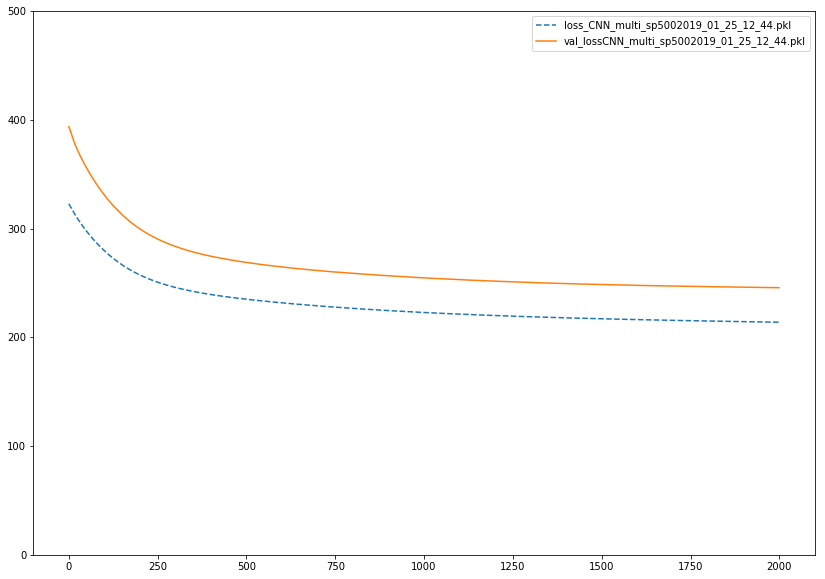

In [119]:
histories = ['CNN_multi_sp5002019_01_25_12_44.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 500)

In [120]:
yhat = model.predict(X_test, verbose=2)

In [121]:
y_test[-1]

2238.830078

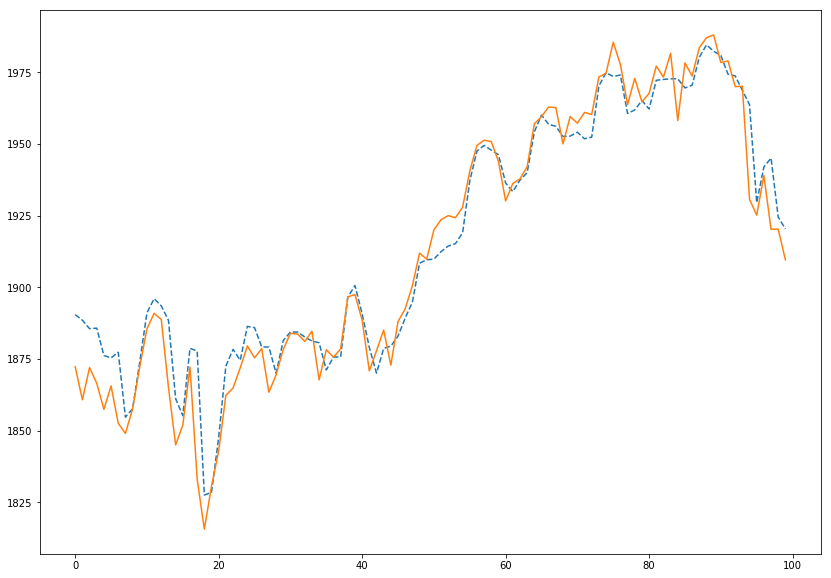

In [123]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat[:100],label ='prediction' ,linestyle='--')
plt.plot(y_test[:100],label='real' )

In [124]:
from sklearn.metrics import r2_score, mean_squared_error

In [125]:
r2_score(y_test, yhat) 

0.7889800929830012

In [126]:
mean_squared_error(y_test, yhat) 

1930.4284762003806

In [97]:
X_test[-10:], y_test[-1]

(array([[[ 0.13232873,  0.15328294,  0.23292599,  0.12468724,  0.26557395,
           0.23985491,  0.27011125,  0.15182695,  0.13560061,  0.06257928],
         [ 0.13382529,  0.15760169,  0.23960629,  0.13128786,  0.27887854,
           0.25425554,  0.27011125,  0.15295224,  0.13952473,  0.06147992],
         [ 0.13550322,  0.15989142,  0.24322575,  0.13126229,  0.27156495,
           0.25015468,  0.28317062,  0.14839117,  0.14109923,  0.06173362],
         [ 0.13423342,  0.15892196,  0.24248618,  0.13445251,  0.28056431,
           0.25814385,  0.27835781,  0.15700791,  0.14129303,  0.06071882],
         [ 0.13613815,  0.16153883,  0.24164239,  0.13515445,  0.27301734,
           0.25349857,  0.28742172,  0.1557763 ,  0.14405449,  0.06139535]],
 
        [[ 0.21892173,  0.19152838,  0.31643553,  0.21479445,  0.45572911,
           0.42859572,  0.32567607,  0.23404239,  0.35702342,  0.15983087],
         [ 0.21850381,  0.19300984,  0.3160721 ,  0.21465682,  0.45510657,
           0.427